### Get Coronovirus cases, Recovered, Deaths cases of Corona around the globe from the url "https://www.worldometers.info/coronavirus/ " using BeautifulSoup and save the result as a dataframe or dictionary

In [2]:
import requests

In [3]:
wiki_link="https://www.worldometers.info/coronavirus/"
link=requests.get(wiki_link).text


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1">
<title>Coronavirus Update (Live): 44,774,241 Cases and 1,179,224 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">

<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">
<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">
<link rel="apple-touch
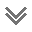

In [4]:
print(link)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 44,774,241 Cases and 1,179,224 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/
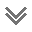

In [5]:
from bs4 import BeautifulSoup
soup = BeautifulSoup (link, 'lxml')
print(soup)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Coronavirus Update (Live): 44,774,241 Cases and 1,179,224 Deaths from COVID-19 Virus Pandemic - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x5
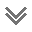

In [6]:
print(soup.prettify())

In [7]:
soup.title

<title>Coronavirus Update (Live): 44,774,241 Cases and 1,179,224 Deaths from COVID-19 Virus Pandemic - Worldometer</title>

In [8]:
soup.title.string

'Coronavirus Update (Live): 44,774,241 Cases and 1,179,224 Deaths from COVID-19 Virus Pandemic - Worldometer'

In [9]:
soup.a

<a class="navbar-brand" href="/"><img border="0" src="/img/worldometers-logo.gif" title="Worldometer"/></a>

In [10]:
soup.find_all("a")

[<a class="navbar-brand" href="/"><img border="0" src="/img/worldometers-logo.gif" title="Worldometer"/></a>,
 <a href="/coronavirus/"><span style="color:#FF9900; font-weight:bold">Coronavirus</span></a>,
 <a href="/population/">Population</a>,
 <a href="/coronavirus/coronavirus-cases/"> </a>,
 <a href="/coronavirus/worldwide-graphs/">Graphs</a>,
 <a href="#countries">Countries</a>,
 <a href="/coronavirus/coronavirus-death-rate/">Death Rate</a>,
 <a href="/coronavirus/coronavirus-symptoms/">Symptoms</a>,
 <a href="/coronavirus/coronavirus-incubation-period/">Incubation</a>,
 <a href="/coronavirus/transmission/">Transmission</a>,
 <a href="#news">News</a>,
 <a href="#countries">view by country</a>,
 <a class="flip_cases_front" href="javascript: void(0);" style="clear: both;display: block;position:absolute;bottom:-8px;width:100%;">Show Graph</a>,
 <a class="flip_cases_back" href="javascript: void(0);" style="clear: both;position: absolute;width:100%;bottom:-8px;left:0;">Show Statistics</

In [26]:
cases=soup.findAll("div", class_ ="maincounter-number")
cases

[<div class="maincounter-number">
 <span style="color:#aaa">44,774,241 </span>
 </div>,
 <div class="maincounter-number">
 <span>1,179,224</span>
 </div>,
 <div class="maincounter-number" style="color:#8ACA2B ">
 <span>32,727,138</span>
 </div>]

In [32]:
other = soup.find_all("span", class_ = "number-table")
other

[<span class="number-table" style="color:#8080FF">10,786,600</span>,
 <span class="number-table" style="color:red ">81,279</span>,
 <span class="number-table" style="color:#8ACA2B">32,727,138</span>,
 <span class="number-table">
 1,179,224</span>]

In [33]:
data = [] 
for i in cases: 
    span = i.find('span') 
    data.append(span.string) 
print(data)

['44,774,241 ', '1,179,224', '32,727,138']


In [34]:
import pandas as pd    
df = pd.DataFrame({"CoronaData": data})  
df.index = ['TotalCases', ' Deaths', 'Recovered']

In [35]:
df

CoronaData
TotalCases  44,774,241 
 Deaths       1,179,224
Recovered    32,727,138